In [1]:
from itertools import chain
import pickle
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import loader_so

sys.path.append("../../../")
from config.label_matchers import matchers

### Load the data:

In [2]:
train_file = "./StackOverflow/train.txt"
dev_file = "./StackOverflow/dev.txt"
test_file = "./StackOverflow/test.txt"

train_posts = loader_so.load_posts(train_file)
dev_posts = loader_so.load_posts(dev_file)
test_posts = loader_so.load_posts(test_file)

In [3]:
print("Number of posts in the train dataset:", len(train_posts))
print("Number of posts in the development dataset:", len(dev_posts))
print("Number of posts in the test dataset:", len(test_posts))

Number of posts in the train dataset: 1625
Number of posts in the development dataset: 533
Number of posts in the test dataset: 560


In [4]:
train_posts[0]

[['If', 'O'],
 ['I', 'O'],
 ['would', 'O'],
 ['have', 'O'],
 ['2', 'O'],
 ['tables', 'B-Data_Structure'],
 ['How', 'O'],
 ['do', 'O'],
 ['I', 'O'],
 ['get', 'O'],
 ['this', 'O'],
 ['result', 'O'],
 ['The', 'O'],
 ['following', 'O'],
 ['query', 'O'],
 ['needs', 'O'],
 ['to', 'O'],
 ['be', 'O'],
 ['adjusted', 'O'],
 [',', 'O'],
 ['but', 'O'],
 ['I', 'O'],
 ['dont', 'O'],
 ['know', 'O'],
 ['how', 'O'],
 ['SQLFIDDLE', 'B-Application'],
 [':', 'O'],
 ['http://sqlfiddle.com/#!9/11093', 'O']]

In [5]:
dev_posts[0]

[['Why', 'O'],
 ['does', 'O'],
 [':', 'O'],
 ['not', 'O'],
 ['compile', 'O'],
 ['but', 'O'],
 [':', 'O'],
 ['compiles', 'O'],
 ['.', 'O']]

In [6]:
test_posts[0]

[['I', 'O'],
 ['am', 'O'],
 ['using', 'O'],
 ['custom', 'O'],
 ['adapter', 'B-Variable'],
 ['which', 'O'],
 ['I', 'O'],
 ['use', 'O'],
 ['for', 'O'],
 ['my', 'O'],
 ['ListView', 'B-Class'],
 ['.', 'O'],
 ['After', 'O'],
 ['creating', 'O'],
 ['ArrayList', 'B-Class'],
 ['I', 'O'],
 ['have', 'O'],
 ['the', 'O'],
 ['following', 'O'],
 ['code', 'O'],
 ['in', 'O'],
 ['my', 'O'],
 ['app', 'O'],
 [':', 'O'],
 ['However', 'O'],
 [',', 'O'],
 ['when', 'O'],
 ['I', 'O'],
 ['try', 'O'],
 ['to', 'O'],
 ['click', 'O'],
 ['on', 'O'],
 ['the', 'O'],
 ['checkbox', 'B-User_Interface_Element'],
 [',', 'O'],
 ['nothing', 'O'],
 ['happens', 'O'],
 ['.', 'O'],
 ['So', 'O'],
 ['I', 'O'],
 ['have', 'O'],
 ['to', 'O'],
 ['manage', 'O'],
 ['toggling', 'O'],
 ['checkbox', 'B-User_Interface_Element'],
 ['state', 'O'],
 ['manually', 'O'],
 ['.', 'O'],
 ['Then', 'O'],
 ['it', 'O'],
 ['works', 'O'],
 ['.', 'O'],
 ['(', 'O'],
 ['before', 'O'],
 ['that', 'O'],
 ['I', 'O'],
 ['have', 'O'],
 ['to', 'O'],
 ['remove', 'O'

### Clean the data:

In [7]:
print("Number of empty posts in the train dataset:", len([1 for sent in train_posts if len(sent) == 0]))
print("Number of empty posts in the development dataset:", len([1 for sent in dev_posts if len(sent) == 0]))
print("Number of empty posts in the test dataset:", len([1 for sent in test_posts if len(sent) == 0]))

Number of empty posts in the train dataset: 0
Number of empty posts in the development dataset: 0
Number of empty posts in the test dataset: 0


In [8]:
train_posts_df = pd.Series([" ".join([word[0] for word in sent]) for sent in train_posts])
dev_posts_df = pd.Series([" ".join([word[0] for word in sent]) for sent in dev_posts])
test_posts_df = pd.Series([" ".join([word[0] for word in sent]) for sent in test_posts])

In [9]:
print(f"Number of duplicated posts in the train dataset: {train_posts_df.duplicated().sum()} ({train_posts_df.duplicated().sum()/train_posts_df.shape[0]:.2%})")
print(f"Number of duplicated posts in the development dataset: {dev_posts_df.duplicated().sum()} ({dev_posts_df.duplicated().sum()/dev_posts_df.shape[0]:.2%})")
print(f"Number of duplicated posts in the test dataset: {test_posts_df.duplicated().sum()} ({test_posts_df.duplicated().sum()/test_posts_df.shape[0]:.2%})")

Number of duplicated posts in the train dataset: 2 (0.12%)
Number of duplicated posts in the development dataset: 1 (0.19%)
Number of duplicated posts in the test dataset: 0 (0.00%)


### Analyze distributions:

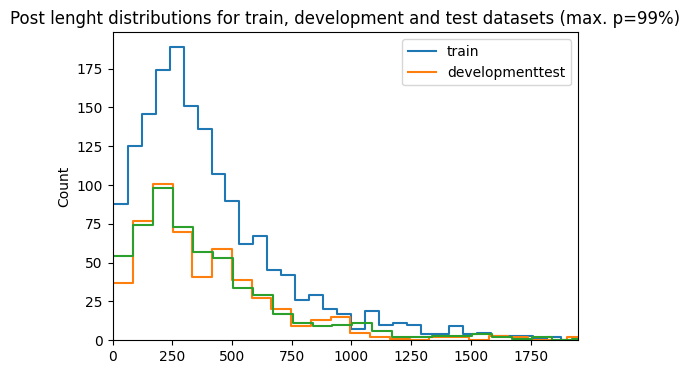

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot([len(post) for post in train_posts_df], element="step", fill=False)
sns.histplot([len(post) for post in dev_posts_df], element="step", fill=False)
sns.histplot([len(post) for post in test_posts_df], element="step", fill=False)
plt.xlim([
    0,
    pd.Series([len(post) for post in train_posts_df] + [len(post) for post in dev_posts_df] + [len(post) for post in test_posts_df]).quantile(.99)
])
plt.legend(labels=["train", "development" "test"])
plt.title("Post lenght distributions for train, development and test datasets (max. p=99%)")
plt.show()

In [11]:
pd.Series(list(chain(*[[word[1] for word in post if (word[1] != "O" and word[1][0:2] == "B-")] for post in train_posts]))).value_counts(dropna=False, normalize=True).round(3)

B-Class                     0.127
B-Application               0.122
B-Variable                  0.105
B-User_Interface_Element    0.087
B-Code_Block                0.078
B-Function                  0.073
B-Language                  0.069
B-Library                   0.069
B-Data_Structure            0.059
B-Data_Type                 0.039
B-File_Type                 0.034
B-File_Name                 0.030
B-Version                   0.024
B-HTML_XML_Tag              0.019
B-Device                    0.019
B-Operating_System          0.016
B-Website                   0.010
B-User_Name                 0.008
B-Output_Block              0.008
B-Algorithm                 0.004
Name: proportion, dtype: float64

In [12]:
pd.Series(list(chain(*[[word[1] for word in post if (word[1] != "O" and word[1][0:2] == "B-")] for post in dev_posts]))).value_counts(dropna=False, normalize=True).round(3)

B-Application               0.141
B-Class                     0.119
B-User_Interface_Element    0.096
B-Variable                  0.085
B-Function                  0.077
B-Code_Block                0.071
B-Library                   0.066
B-Data_Structure            0.053
B-Language                  0.046
B-Device                    0.044
B-Version                   0.040
B-Data_Type                 0.040
B-File_Name                 0.039
B-File_Type                 0.026
B-Operating_System          0.021
B-Website                   0.011
B-HTML_XML_Tag              0.011
B-User_Name                 0.009
B-Algorithm                 0.003
B-Output_Block              0.002
Name: proportion, dtype: float64

In [13]:
pd.Series(list(chain(*[[word[1] for word in post if (word[1] != "O" and word[1][0:2] == "B-")] for post in test_posts]))).value_counts(dropna=False, normalize=True).round(3)

B-Class                     0.139
B-Application               0.111
B-Variable                  0.103
B-User_Interface_Element    0.097
B-Code_Block                0.082
B-Function                  0.072
B-Library                   0.070
B-Data_Structure            0.067
B-Language                  0.048
B-File_Name                 0.044
B-File_Type                 0.035
B-Version                   0.030
B-Data_Type                 0.030
B-Operating_System          0.018
B-Device                    0.014
B-HTML_XML_Tag              0.014
B-Website                   0.011
B-User_Name                 0.006
B-Algorithm                 0.004
B-Output_Block              0.004
Name: proportion, dtype: float64

*WARNING: There are highly underrepresented entities.*

### Persist datasets:

In [14]:
all_posts = train_posts + dev_posts + test_posts

In [ ]:
label_names = matchers["se_entities"]

for post in all_posts:
    for token in post:
        token[1] = label_names.index(token[1])

In [19]:
with open("./se_entities.pkl", "wb") as file:
    pickle.dump(all_posts, file)

In [ ]:
print("Number of posts in the persisted dataset:", len(all_posts))

Number of sentences in the persisted dataset: 2718


In [21]:
# Deserialize the object from the binary file
with open("./se_entities.pkl", "rb") as file:
    loaded_data = pickle.load(file)

In [22]:
loaded_data[0]

[['If', 0],
 ['I', 0],
 ['would', 0],
 ['have', 0],
 ['2', 0],
 ['tables', 1],
 ['How', 0],
 ['do', 0],
 ['I', 0],
 ['get', 0],
 ['this', 0],
 ['result', 0],
 ['The', 0],
 ['following', 0],
 ['query', 0],
 ['needs', 0],
 ['to', 0],
 ['be', 0],
 ['adjusted', 0],
 [',', 0],
 ['but', 0],
 ['I', 0],
 ['dont', 0],
 ['know', 0],
 ['how', 0],
 ['SQLFIDDLE', 3],
 [':', 0],
 ['http://sqlfiddle.com/#!9/11093', 0]]